# H1B-2024 Single Registration Data Analysis

## Introduction

This notebook provides an analysis of the H1B-2024 single registration data. The H1B visa is a non-immigrant visa that allows U.S. companies to employ foreign workers in specialty occupations. Analyzing the data helps to:

- Understand the trends in H1B registrations.
- Identify key insights regarding applicants and employers.
- Highlight any irregularities or notable patterns in the data.

## Data Sources

- **Dataset Name**: [https://github.com/BloombergGraphics/2024-h1b-immigration-data]
- **Source**: [BloombergGraphics]
- **Time Period**: H1B registrations for the 2024 fiscal year.

## Objectives

1. Understand the distribution of registrations across various dimensions such as:
    - Geographic locations (state/country of origin).
    - Industry types.
    - Job roles and wages.
2. Analyze acceptance rates and trends.
3. Visualize key insights using graphs and charts.

## Steps in the Analysis

1. **Data Loading and Preparation**
    - Importing necessary libraries.
    - Loading the dataset into Pandas DataFrame.
    - Data cleaning (e.g., handling missing values, formatting columns).

2. **Exploratory Data Analysis (EDA)**
    - Summarizing data statistics.
    - Analyzing distributions and correlations.
    - Visualizing data with histograms, bar charts, scatter plots, etc.

3. **Detailed Insights**
    - Identifying top locations and industries.
    - Analyzing wages and job roles.
    - Spotting any anomalies in the data.

4. **Conclusion and Recommendations**
    - Summarizing findings.
    - Proposing next steps for deeper analysis or data-driven actions.

## Libraries Used

The following Python libraries are used in this notebook:

- **Pandas**: For data manipulation and analysis.
- **NumPy**: For numerical computations.
- **Matplotlib** and **Seaborn**: For data visualization.
- **Scikit-learn**: (Optional) For advanced data analysis and modeling.

## Notebook Structure

1. **Introduction**: Overview of the problem and objectives.
2. **Data Preparation**: Steps to prepare the dataset for analysis.
3. **Exploratory Data Analysis (EDA)**: Key observations and insights.
4. **In-Depth Analysis**: Detailed analysis of specific aspects of the data.
5. **Visualization**: Graphical representation of findings.
6. **Conclusion**: Key takeaways and recommendations.

## Next Steps

- Load the dataset and proceed to data cleaning.
- Begin exploratory analysis to uncover initial trends.

> **Note**: Please ensure that the dataset is formatted correctly and any personal or sensitive information is anonymized before analysis.


In [ ]:
# !pip3 install -U pandas
# !pip3 install -U numpy
# !pip3 install -U matplotlib
# !pip3 install -U yfinance
# !pip3 install -U yahooquery

In [124]:
## Importing Lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import yahooquery as yq

#Getting Ticker 
def find_ticker(name):
    try:
        data = yq.search(name)
    except ValueError as e: # Will catch JSONDecodeError
        print(e)
    else:
        quotes = data['quotes']
        if len(quotes) == 0:
            return 'No Symbol Found'

        symbol = quotes[0]['symbol']
        
        return symbol

In [82]:
   # import seaborn as sns
data = pd.read_csv("TRK_13139_FY2024_single_reg.csv")

<ipython-input-82-ea420adc19ef>:2: DtypeWarning: Columns (4,7,14,16,29,40,44,50,51,52,55) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../Downloads/TRK_13139_FY2024_single_reg.csv")


In [83]:
# Display the first few rows
data.head()

,bcn,country_of_birth,country_of_nationality,ben_date_of_birth,ben_year_of_birth,gender,employer_name,FEIN,mail_addr,city,...,S1Q1B,BEN_EDUCATION_CODE,ED_LEVEL_DEFINITION,BEN_PFIELD_OF_STUDY,BEN_COMP_PAID,DOT_CODE,NAICS_CODE,S3Q1,S4Q1,T_U_VAWA_FLAG
0,(b)(6),IND,IND,(b)(6),1994,male,Mphasis Corporation,954759720,41 Madison Ave,New York,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(b)(6),KOR,KOR,(b)(6),1994,male,"Tennessee Dental Professionals, PC",200418100,1200 Network Centre Drive,Effingham,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,(b)(6),IND,IND,(b)(6),1982,male,KPMG LLP,135565207,2323 Ross Ave,Dallas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,(b)(6),IND,IND,(b)(6),1995,male,3D TECHNOLOGIES LLC,384053952,423 W Wheatland Rd,Duncanville,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,(b)(6),GHA,GHA,(b)(6),1990,male,"LER TechForce, LLC",352139176,1888 Poshard Drive,Columbus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
# Data Cleaning and Preparation
# Check for missing values
print(data.isnull().sum())

bcn                              0
country_of_birth                 0
country_of_nationality           0
ben_date_of_birth                0
ben_year_of_birth                0
gender                           0
employer_name                    1
FEIN                             0
mail_addr                        0
city                             0
state                            0
zip                              0
agent_first_name                52
agent_last_name                163
lottery_year                     0
status_type                      0
ben_multi_reg_ind                0
RECEIPT_NUMBER              281270
rec_date                    281270
FIRST_DECISION              281685
first_decision_date         281685
i129_employer_name          281270
PET_STREET                  281270
PET_CITY                    281270
PET_STATE                   281270
PET_ZIP                     281271
REQUESTED_CLASS             281273
BASIS_FOR_CLASSIFICATION    281273
REQUESTED_ACTION    

In [85]:
data = data[data.FIRST_DECISION == 'Approved']

In [86]:
# Fill or drop missing values if necessary
data = data.dropna(subset=['employer_name', 'country_of_birth', 'JOB_TITLE', 'WAGE_AMT', 'WORKSITE_STATE'])

In [77]:
# Convert WAGE_AMT to numeric if needed
data['WAGE_AMT'] = pd.to_numeric(data['WAGE_AMT'], errors='coerce')

In [150]:
# Improving Company Name Quality for yf 
data.employer_name = data.employer_name.apply(lambda x: x.lower())
data.JOB_TITLE = data.JOB_TITLE.apply(lambda x: x.lower())

data.employer_name = data.employer_name.apply(lambda x: 'amazon' if 'amazon' in x else x)
data.employer_name = data.employer_name.apply(lambda x: 'deloitte' if 'deloitte' in x else x)
data.employer_name = data.employer_name.apply(lambda x: x.replace('corporation','') if 'corporation' in x else x)
data.employer_name = data.employer_name.apply(lambda x: x.replace('us corp','') if 'us corp' in x else x)
data.employer_name = data.employer_name.apply(lambda x: x.replace('inc.','') if 'inc.' in x else x)
data.employer_name = data.employer_name.apply(lambda x: x.replace('limited','') if 'limited' in x else x)
data.employer_name = data.employer_name.apply(lambda x: x.replace('limited','') if 'limited' in x else x)
data.employer_name = data.employer_name.apply(lambda x: x.replace('-','') )
data.employer_name = data.employer_name.apply(lambda x: x.replace('google','alphabet inc') if 'Google' in x else x)


In [134]:
# Exploratory Data Analysis (EDA)
# Top Employers
top_employers = data['employer_name'].value_counts().head(50)
print("Top Employers:")
print(top_employers)

Top Employers:
employer_name
amazon                                          2805
infosys                                         1662
cognizant technology solutions                  1439
alphabet inc llc                                 868
microsoft                                        725
ibm                                              717
wipro                                            639
meta platforms,                                  536
capgemini america,                               533
apple                                            518
intel                                            503
tata consultancy services                        488
deloitte                                         481
ernst & young u.s. llp                           462
ltimindtree                                      414
accenture llp                                    404
mckinsey & company,  united states               308
hcl america inc                                  280
tech mahindra ame

In [56]:
# Country of Birth Distribution
birth_country_counts = data['country_of_birth'].value_counts().head(10)
print("Top Countries of Birth:")
print(birth_country_counts)

Top Countries of Birth:
country_of_birth
IND    28753
CHN     8301
TWN      828
KOR      750
MEX      727
CAN      697
PAK      583
PHL      504
BRA      467
NPL      456
Name: count, dtype: int64


In [151]:
# Common Job Titles
common_jobs = data['JOB_TITLE'].value_counts().head(10)
print("Most Common Job Titles:")
print(common_jobs)

Most Common Job Titles:
JOB_TITLE
software engineer                   3867
software developer                  2039
software development engineer i     1214
analyst                              581
associate                            574
data scientist                       487
software development engineer ii     375
senior software engineer             310
data engineer                        293
process engineer                     271
Name: count, dtype: int64


In [58]:
# Wage Analysis
print("Wage Statistics:")
print(data['WAGE_AMT'].describe())

Wage Statistics:
count    4.925500e+04
mean     1.121078e+05
std      2.087781e+05
min      0.000000e+00
25%      8.022600e+04
50%      1.003600e+05
75%      1.328700e+05
max      1.961310e+07
Name: WAGE_AMT, dtype: float64


In [59]:
# Worksite State Distribution
worksite_distribution = data['WORKSITE_STATE'].value_counts().head(20)
print("Top Worksite States:")
print(worksite_distribution)

Top Worksite States:
WORKSITE_STATE
CA    10073
TX     7951
NJ     4673
NY     4386
WA     3459
IL     2375
MA     2012
GA     1435
NC     1379
VA     1321
FL     1231
MI     1127
PA      943
MD      807
AZ      664
OH      605
IN      447
OR      417
CT      393
CO      368
Name: count, dtype: int64


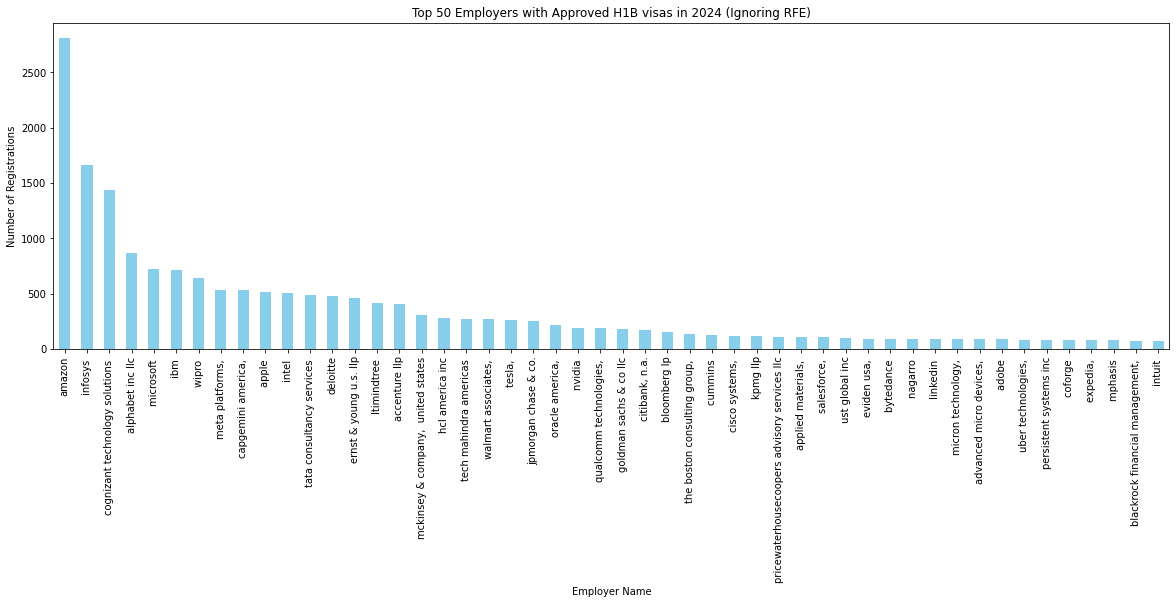

In [154]:
# Visualization
# Bar chart for top employers
plt.figure(figsize=(20, 6))
top_employers.plot(kind='bar', color='skyblue')
plt.title('Top 50 Employers with Approved H1B visas in 2024 (Ignoring RFE)')
plt.xlabel('Employer Name')
plt.ylabel('Number of Registrations')
plt.show()


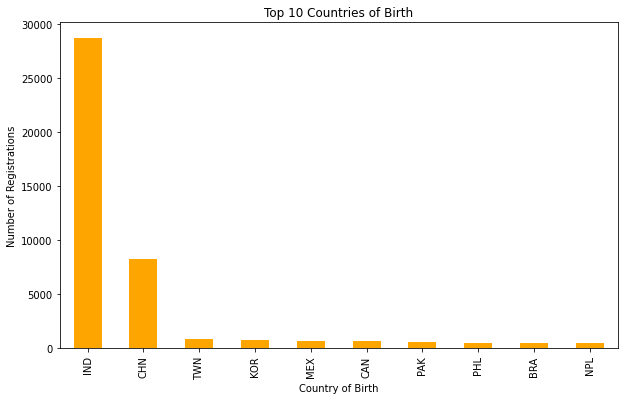

In [148]:
# Bar chart for country of birth
plt.figure(figsize=(10, 6))
birth_country_counts.plot(kind='bar', color='orange')
plt.title('Top 10 Countries of Birth')
plt.xlabel('Country of Birth')
plt.ylabel('Number of Registrations')
plt.show()


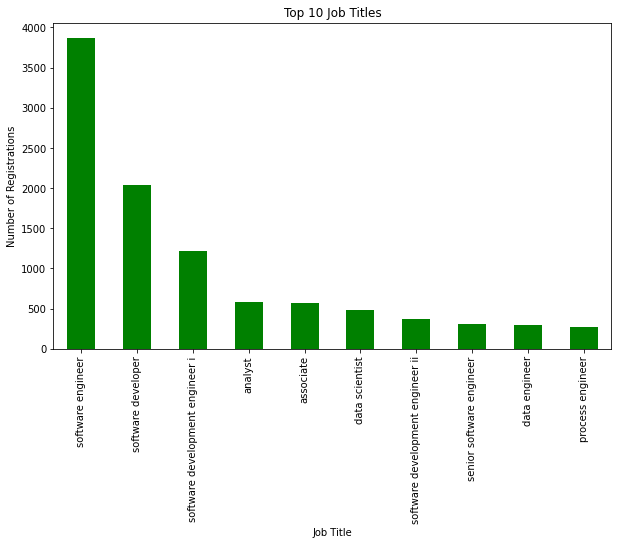

In [152]:
# Bar chart for common job titles
plt.figure(figsize=(10, 6))
common_jobs.plot(kind='bar', color='green')
plt.title('Top 10 Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Number of Registrations')
plt.show()